<a href="https://colab.research.google.com/github/10Rachit/MovieIQ-Predictive-Analytics-on-Film-Success/blob/main/Marketing_Campaign_Effectiveness_Analysis_and_ROI_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("marketing_campaign.csv")

In [ ]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [ ]:
row, col = df.shape
print(f"{'Number of rows':<20}: {row}\n{'Number of columns':<20}: {col:<20}")

Number of rows      : 22029
Number of columns   : 16                  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [ ]:
df.describe().round(2)

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.00,22029.00,22029.00,22029.00,22029.00,22029.00,22029.00
mean,11015.00,4.76,5522.74,182.86,2223.81,50610.40,6.58
std,6359.37,0.96,2597.67,301.62,1394.17,28542.98,1.46
min,1.00,2.02,1000.00,-98.30,30.00,1001.00,4.00
25%,5508.00,4.13,3286.00,-4.08,1067.00,25804.00,5.00
50%,11015.00,4.76,5525.00,93.65,2088.00,50858.00,7.00
75%,16522.00,5.43,7766.00,247.31,3212.00,75165.00,8.00
max,22029.00,7.47,9999.00,3109.79,6887.00,99999.00,9.00


In [ ]:
print("Number of Unique Values:", df.Campaign_ID.nunique())

Number of Unique Values: 22029


In [ ]:
print("Unique Values in Location attribute:\n\n", df.Location.unique(),
      "\n\nUnique Values in Customer_Segment attribute:\n\n", df.Customer_Segment.unique())

Unique Values in Location attribute:

 ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco'] 

Unique Values in Customer_Segment attribute:

 ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


In [ ]:
df.Campaign_Type.value_counts()

,count
Campaign_Type,
Display,4450
Search,4441
Social Media,4412
Email,4388
Influencer,4338


In [ ]:
df.Channel_Used.value_counts()

,count
Channel_Used,
Facebook,3742
Google Ads,3694
Website,3688
Instagram,3649
YouTube,3632
Email,3624


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

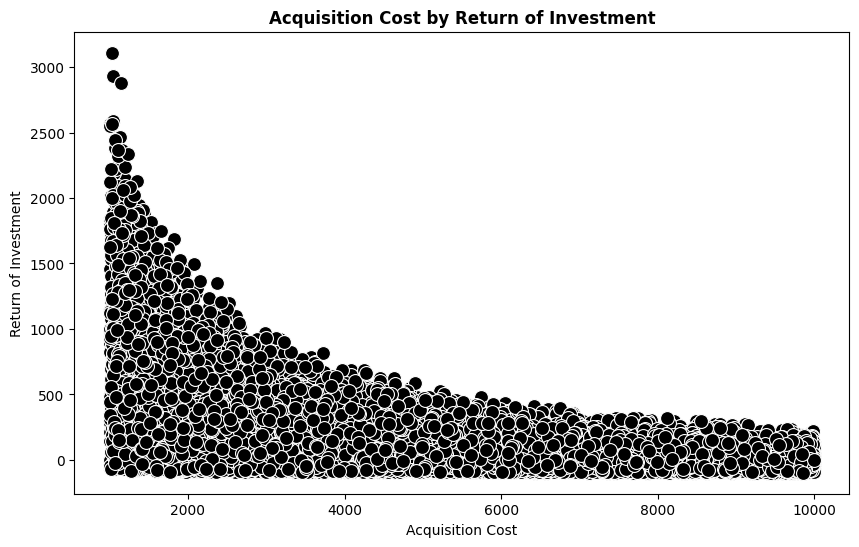

In [ ]:
plt.figure(figsize=(10,6), facecolor='white')

sns.scatterplot(x="Acquisition_Cost", y="ROI", data=df, color='black', s=100)

plt.gca().set_facecolor('white')

plt.title("Acquisition Cost by Return of Investment", fontweight='bold')
plt.xlabel("Acquisition Cost")
plt.ylabel("Return of Investment")

plt.show()

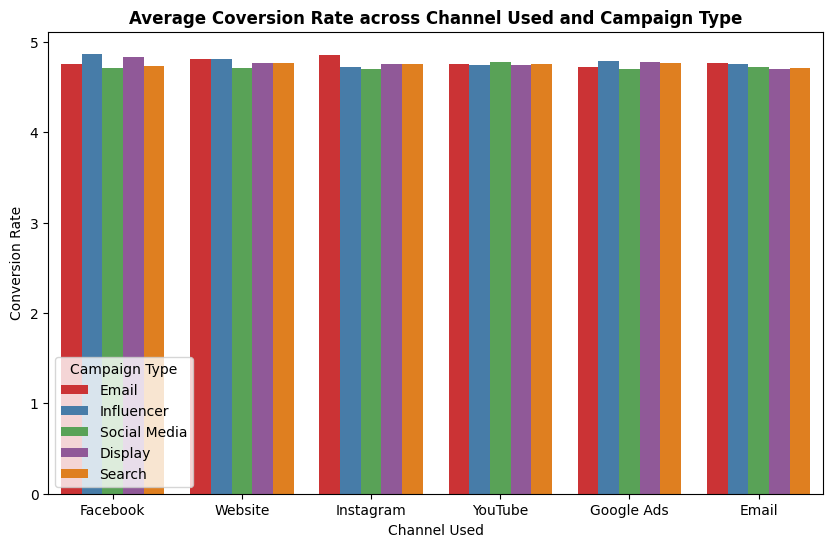

In [ ]:
order_CR = df.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='white')

sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=df, order=order_CR, palette='Set1', errorbar=None)

plt.gca().set_facecolor('white')

plt.title('Average Coversion Rate across Channel Used and Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Conversion Rate')
plt.legend(title='Campaign Type', loc='lower left')

plt.show()


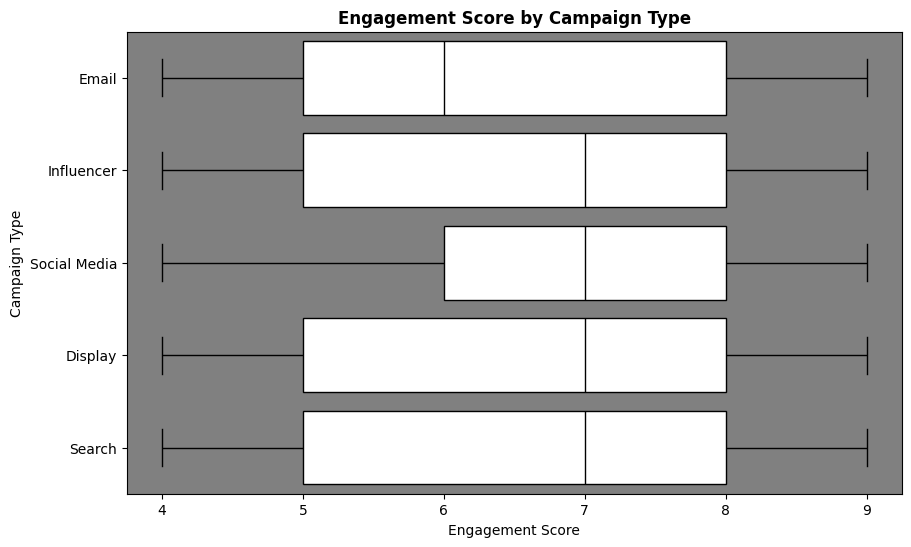

In [ ]:
plt.figure(figsize=(10,6), facecolor='white')

sns.boxplot(x='Engagement_Score', y='Campaign_Type', data=df, color='white', linecolor='black')

plt.gca().set_facecolor('grey')

plt.title('Engagement Score by Campaign Type', fontweight='bold')
plt.xlabel('Engagement Score')
plt.ylabel('Campaign Type')

plt.show()

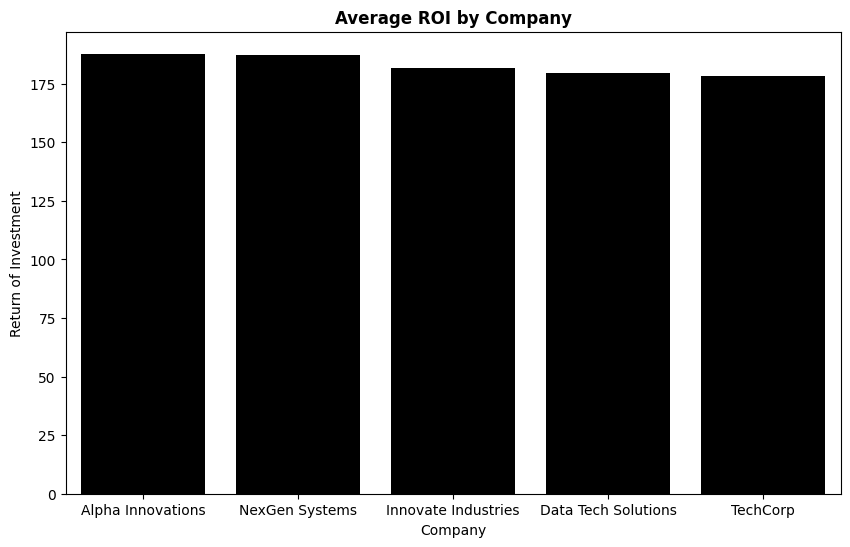

In [ ]:
order_ROI = df.groupby('Company')['ROI'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='white')

sns.barplot(x='Company', y='ROI', data=df, order=order_ROI, color='black', errorbar=None)

plt.gca().set_facecolor('white')

plt.title('Average ROI by Company', fontweight='bold')
plt.ylabel('Return of Investment')

plt.show()

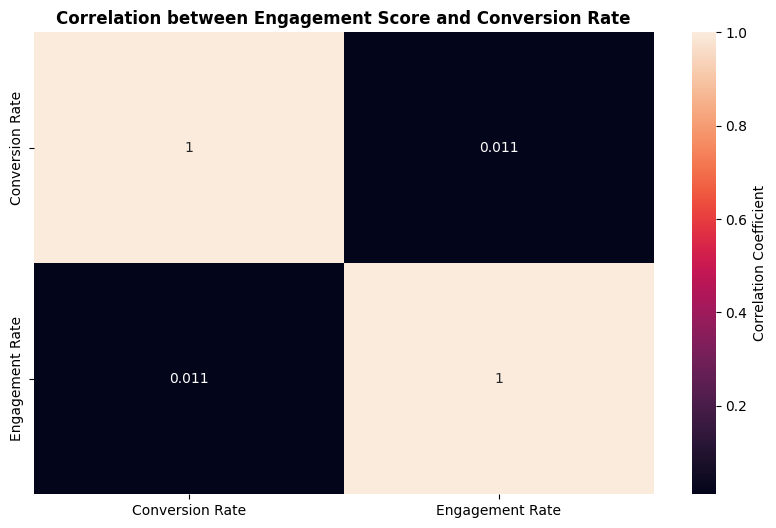

In [ ]:
plt.figure(figsize=(10,6), facecolor='white')

sns.heatmap(df[['Conversion_Rate','Engagement_Score']].corr(), annot=True,
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=['Conversion Rate', 'Engagement Rate'], yticklabels=['Conversion Rate', 'Engagement Rate'])

plt.title('Correlation between Engagement Score and Conversion Rate', fontweight='bold')

plt.show()

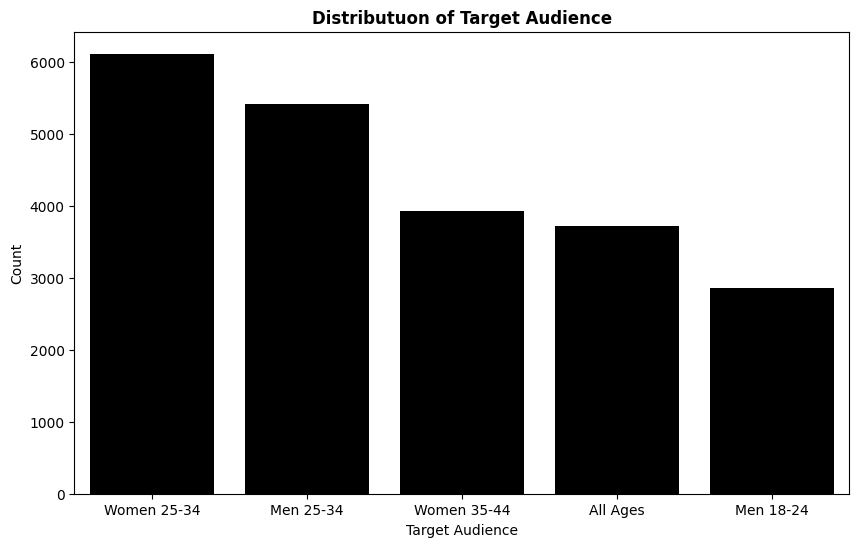

In [ ]:
plt.figure(figsize=(10,6), facecolor='white')

sns.countplot(x='Target_Audience', data=df, color='black', order=df.Target_Audience.value_counts().index)

plt.gca().set_facecolor('white')

plt.title('Distributuon of Target Audience', fontweight='bold')
plt.xlabel('Target Audience')
plt.ylabel('Count')

plt.show()

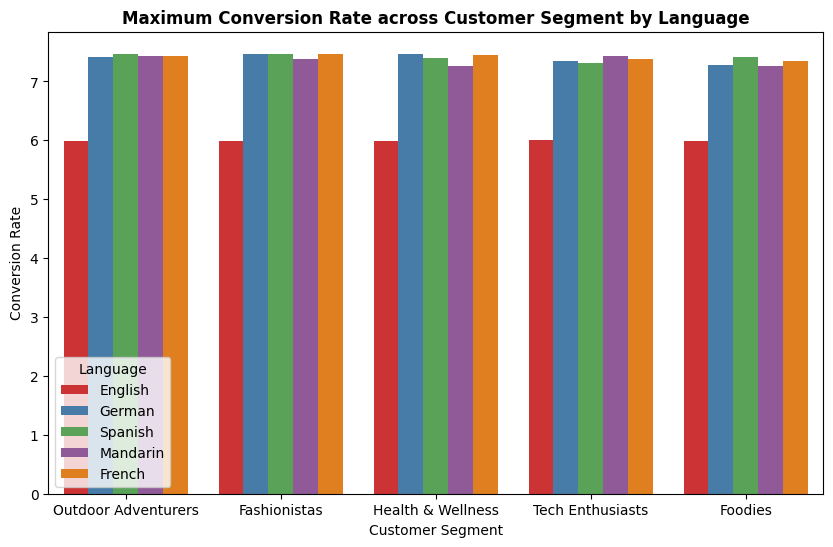

In [ ]:
order_CS = df.groupby('Customer_Segment')['Conversion_Rate'].max().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='white')

sns.barplot(x='Customer_Segment', y='Conversion_Rate', hue='Language', data=df, order=order_CS, estimator='max',
            palette='Set1', errorbar=None)

plt.gca().set_facecolor('white')

plt.title('Maximum Conversion Rate across Customer Segment by Language', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.legend(title='Language', loc='lower left')

plt.show()

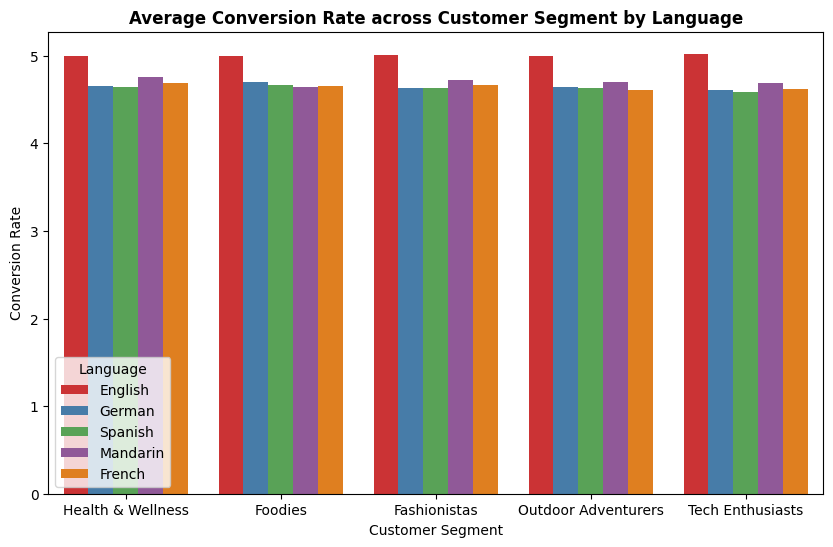

In [ ]:
order_CS = df.groupby('Customer_Segment')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='white')

sns.barplot(x='Customer_Segment', y='Conversion_Rate', hue='Language', data=df, order=order_CS, palette='Set1', errorbar=None)

plt.gca().set_facecolor('white')

plt.title('Average Conversion Rate across Customer Segment by Language', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.legend(title='Language', loc='lower left')

plt.show()

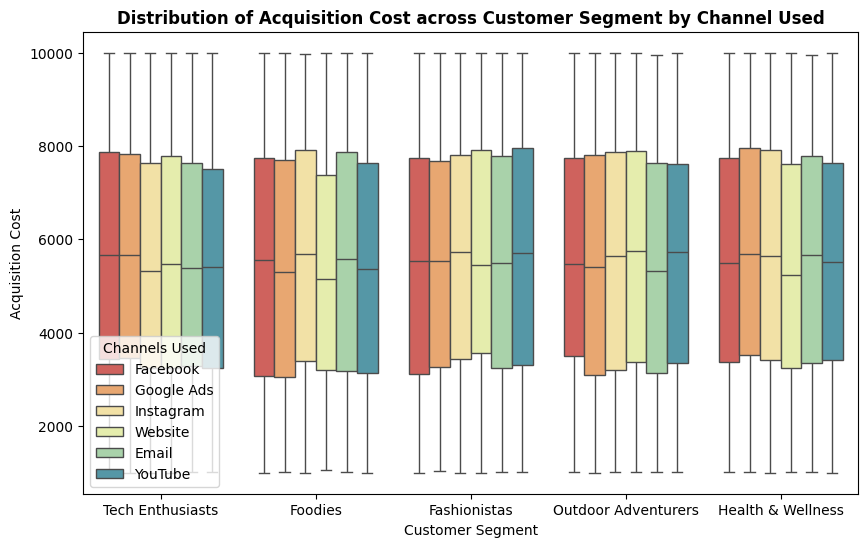

In [ ]:
plt.figure(figsize=(10, 6), facecolor='white')

sns.boxplot(y='Acquisition_Cost', x='Customer_Segment', hue='Channel_Used', data=df, palette='Spectral')

plt.gca().set_facecolor('white')

plt.title('Distribution of Acquisition Cost across Customer Segment by Channel Used', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.legend(title='Channels Used', loc='lower left')

plt.show()

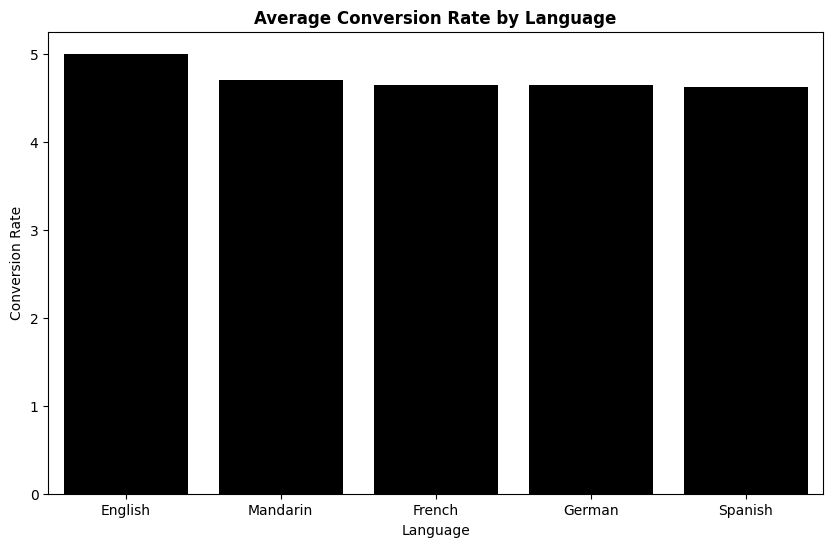

In [ ]:
order_CRL = df.groupby('Language')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='white')

sns.barplot(x='Language', y='Conversion_Rate', data=df, order=order_CRL, color='black', errorbar=None)

plt.gca().set_facecolor('white')

plt.title('Average Conversion Rate by Language', fontweight='bold')
plt.ylabel('Conversion Rate')

plt.show()

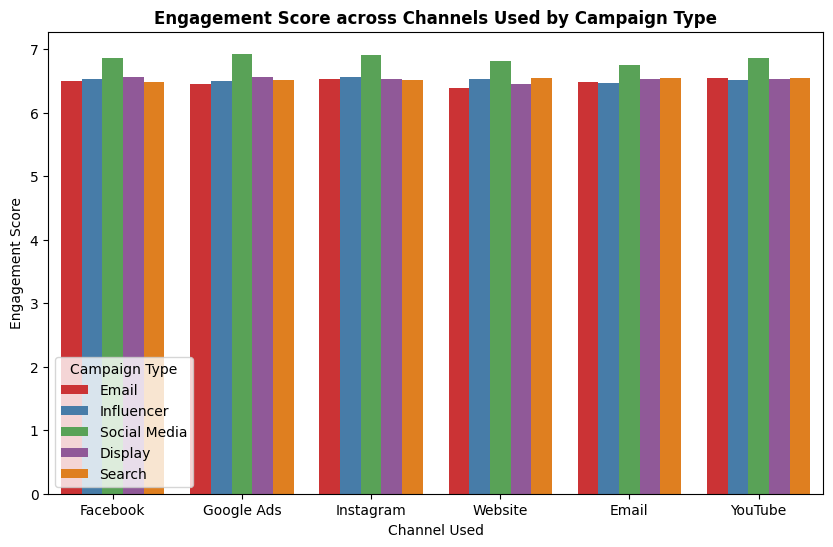

In [ ]:
plt.figure(figsize=(10,6), facecolor='white')

sns.barplot(x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', data=df, palette='Set1', errorbar=None)

plt.gca().set_facecolor('white')

plt.title('Engagement Score across Channels Used by Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Engagement Score')
plt.legend(title='Campaign Type', loc='lower left')

plt.show()

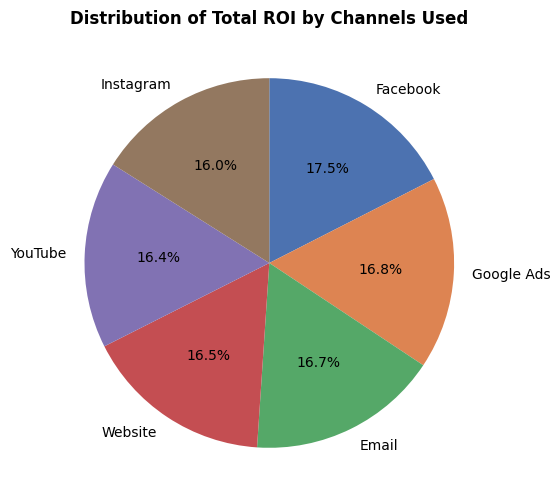

In [ ]:
pie = df.groupby(by='Channel_Used')['ROI'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6), facecolor='white')

color = sns.color_palette('deep', len(pie))

plt.pie(pie, labels=pie.index, autopct='%1.1f%%', colors=color, startangle=90, counterclock=False)

plt.title('Distribution of Total ROI by Channels Used', fontweight='bold')

plt.show()

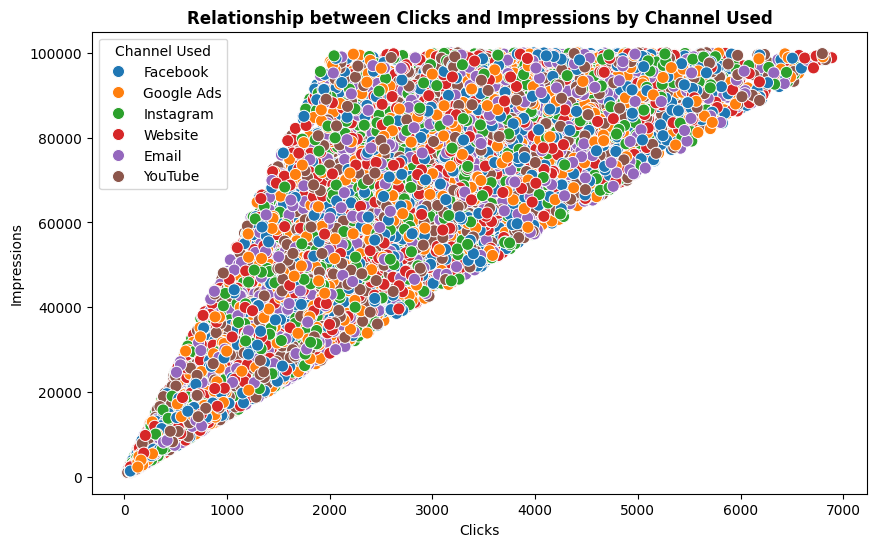

In [ ]:
plt.figure(figsize=(10,6), facecolor='white')

sns.scatterplot(x='Clicks', y='Impressions', hue='Channel_Used', data=df , color='black', s=75)

plt.gca().set_facecolor('white')

plt.title('Relationship between Clicks and Impressions by Channel Used', fontweight='bold')
plt.legend(title='Channel Used')

plt.show()

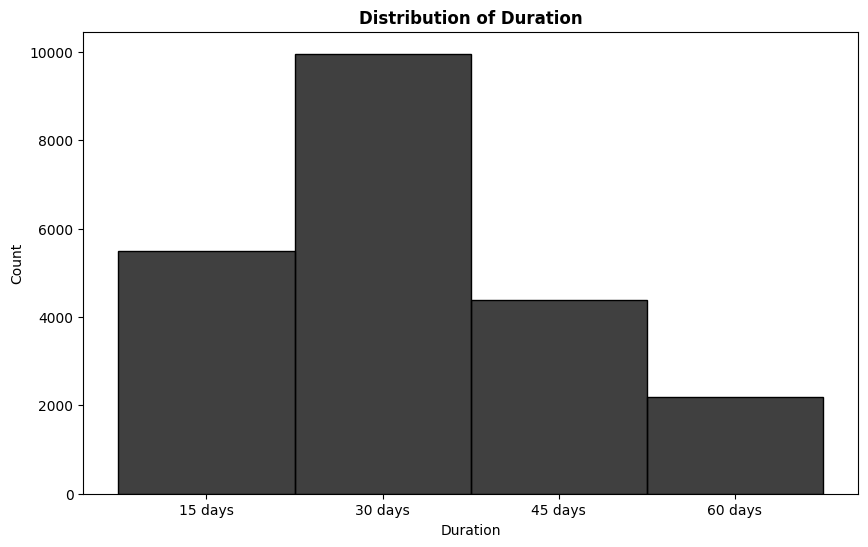

In [ ]:
plt.figure(figsize=(10, 6), facecolor='white')

sorted_data = df.sort_values(by='Duration')

sns.histplot(sorted_data['Duration'], color='black')

plt.gca().set_facecolor('white')

plt.title('Distribution of Duration', fontweight='bold')

plt.show()

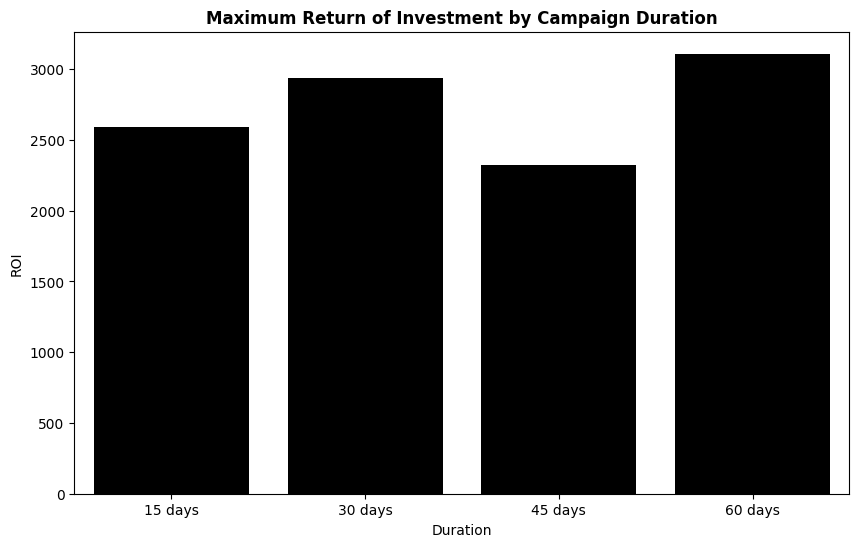

In [ ]:
plt.figure(figsize=(10, 6), facecolor='white')

order_D_ROI = df.Duration.sort_values()

sns.barplot(x='Duration', y='ROI', data=df, estimator='max', order=order_D_ROI, errorbar=None, color='blacK')

plt.gca().set_facecolor('white')

plt.title('Maximum Return of Investment by Campaign Duration', fontweight='bold')

plt.show()

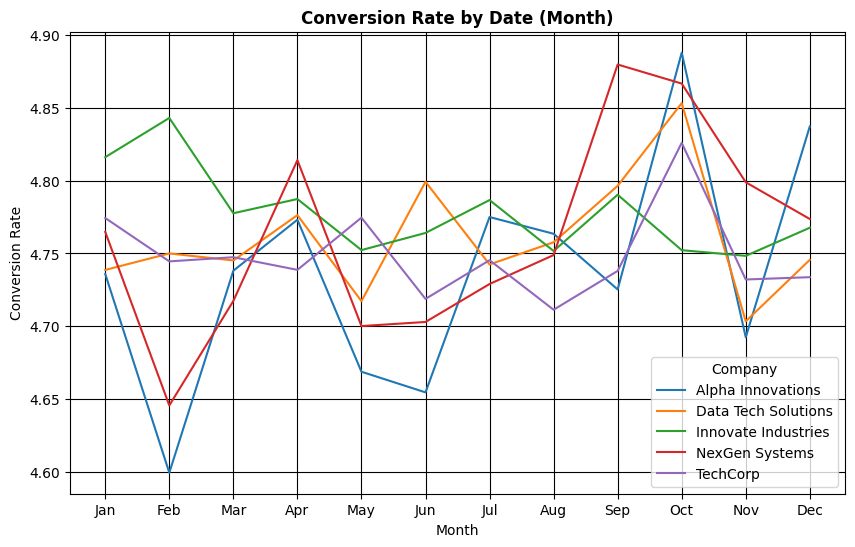

In [ ]:
import calendar

df.Date = pd.to_datetime(df['Date'], format='%d-%m-%Y')

monthly_df = df.groupby([df['Company'], df['Date'].dt.strftime('%b')]).agg({'Conversion_Rate' : 'mean'}).reset_index()

monthly_df['Date'] = pd.Categorical(monthly_df['Date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10,6), facecolor='white')

sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=monthly_df, errorbar=None)

plt.gca().set_facecolor('white')

plt.title('Conversion Rate by Date (Month)', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Month')
plt.grid(True, color='black')

plt.show()

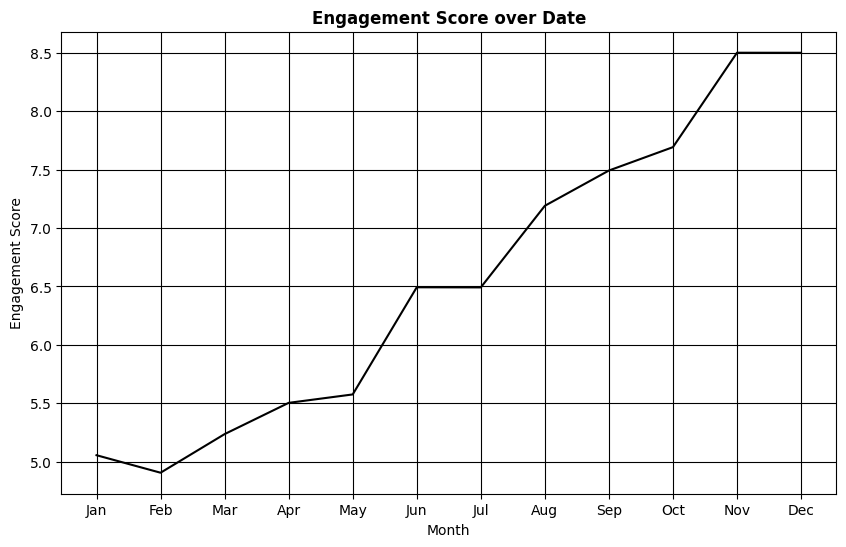

In [ ]:
eng_sc = df.groupby(df['Date'].dt.strftime('%b')).agg({'Engagement_Score' : 'mean'}).reset_index()

eng_sc['Date'] = pd.Categorical(eng_sc['Date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10, 6), facecolor='white')

sns.lineplot(x='Date', y='Engagement_Score', data=eng_sc, color='black')

plt.gca().set_facecolor('white')

plt.title('Engagement Score over Date', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Engagement Score')
plt.grid(True, color='black')

plt.show()

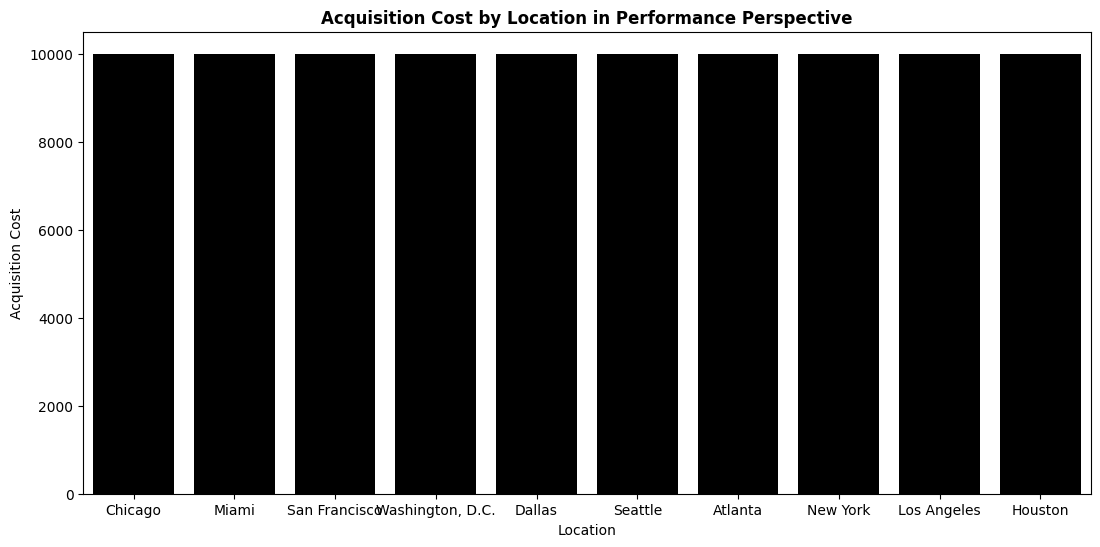

In [ ]:
loc_ord_AC = df.groupby(by='Location')['Acquisition_Cost'].max().sort_values(ascending=False).index

plt.figure(figsize=(13, 6), facecolor='white')

sns.barplot(x='Location', y='Acquisition_Cost', data=df, estimator='max', order=loc_ord_AC, errorbar=None, color='black')

plt.gca().set_facecolor('white')

plt.title('Acquisition Cost by Location in Performance Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')

plt.show()

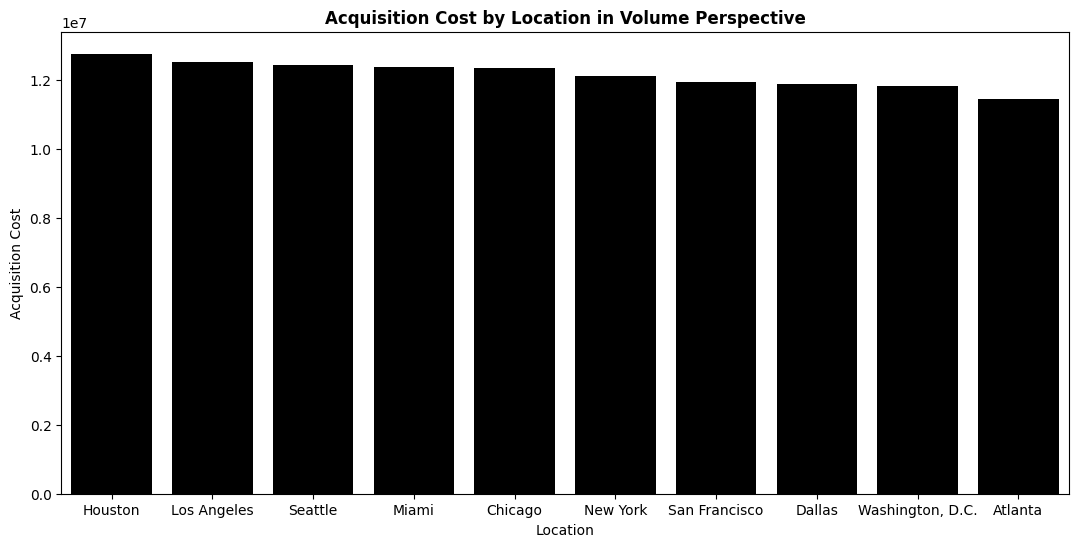

In [ ]:
loc_ord_AC = df.groupby(by='Location')['Acquisition_Cost'].sum().sort_values(ascending=False).index

plt.figure(figsize=(13, 6), facecolor='white')

sns.barplot(x='Location', y='Acquisition_Cost', data=df, estimator='sum', order=loc_ord_AC, errorbar=None, color='black')

plt.gca().set_facecolor('white')

plt.title('Acquisition Cost by Location in Volume Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')

plt.show()

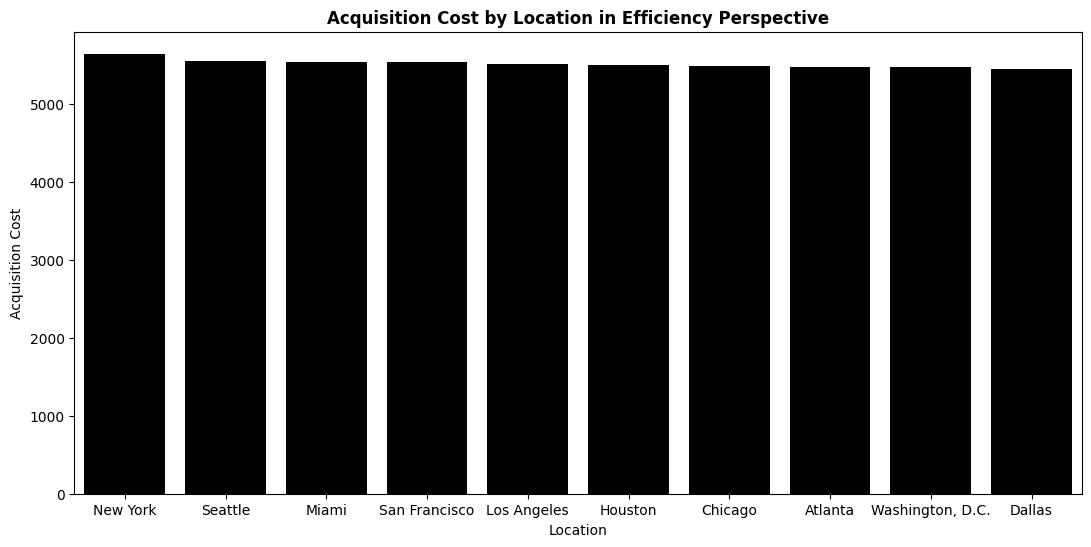

In [ ]:
loc_ord_AC = df.groupby(by='Location')['Acquisition_Cost'].mean().sort_values(ascending=False).index

plt.figure(figsize=(13, 6), facecolor='white')

sns.barplot(x='Location', y='Acquisition_Cost', data=df, estimator='mean', order=loc_ord_AC, errorbar=None, color='black')

plt.gca().set_facecolor('white')

plt.title('Acquisition Cost by Location in Efficiency Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')

plt.show()

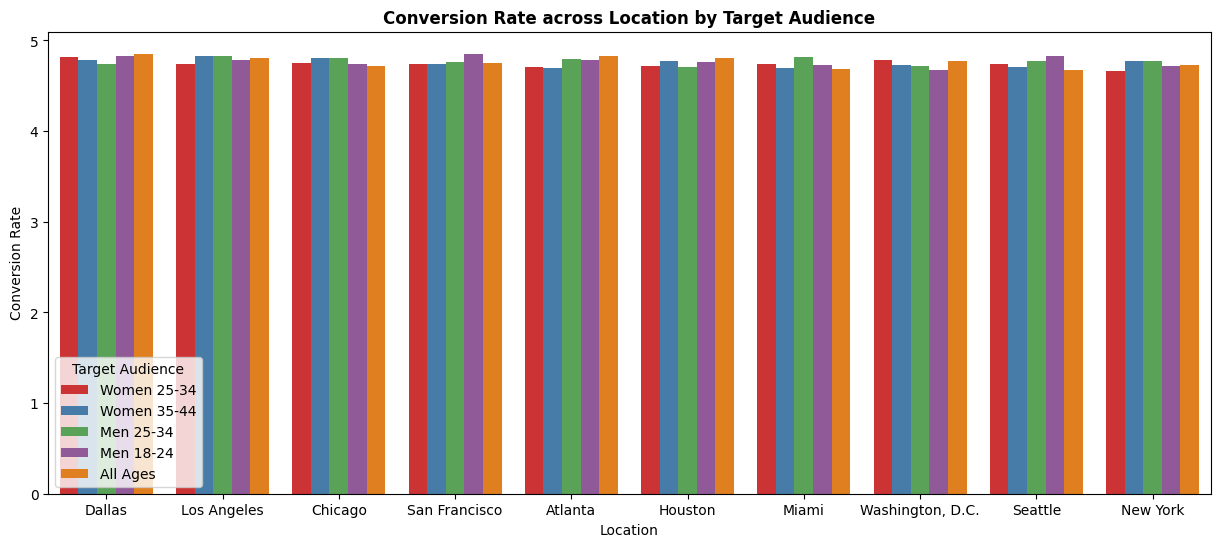

In [ ]:
plt.figure(figsize=(15, 6), facecolor='white')

loc_ord_CR = df.groupby(by='Location')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.gca().set_facecolor('white')

sns.barplot(x='Location', y='Conversion_Rate', hue='Target_Audience', data=df, order=loc_ord_CR, palette='Set1', errorbar=None)

plt.title('Conversion Rate across Location by Target Audience', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.legend(loc='lower left', title='Target Audience')

plt.show()

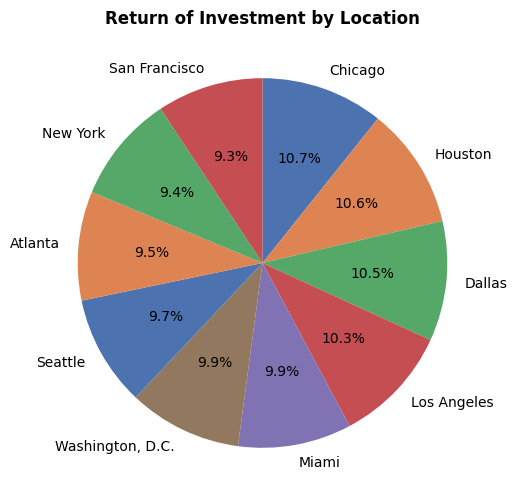

In [ ]:
roi_pie = df.groupby('Location')['ROI'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6), facecolor='white')

color = sns.color_palette('deep', len(pie))

plt.pie(roi_pie, labels=roi_pie.index, autopct='%1.1f%%', colors=color, startangle=90, counterclock=False)

plt.gca().set_facecolor('white')

plt.title('Return of Investment by Location', fontweight='bold')

plt.show()


https://github.com/vignesh4005/Marketing_Campaign_Performance_Insights/blob/main/Marketing%20Campaign%20Performance%20Insights.ipynb